In [1]:
# Initial imports
from path import Path
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf
%matplotlib inline

In [2]:
# import CSV file into dataframe


file_path = Path('Resources/financials_and_sentiments.csv')
df = pd.read_csv(file_path)
#df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
#df.set_index('Date',inplace=True)
#df.sort_index(inplace=True)
df.dropna()


,Ticker,Date,Pos,Neu,Neg,Normalized,Close,Returns,12-day Rolling,5-day Rolling,3-day Rolling,12-day Rolling Std,5-day Rolling Std,3-day Rolling Std,difference 1-day,difference 3-days,direction 1-day,direction 3-days
0,A,2019-08-14,0.101,0.884,0.014,1,65.59,-0.030308,-0.005657,-0.006860,-0.014811,0.020223,0.024598,0.025959,-2.05,-3.05,0,0
1,AAL,2019-10-24,0.133,0.847,0.020,1,29.41,0.039590,0.009595,0.010526,0.009358,0.015567,0.019245,0.027056,1.12,0.79,1,1
2,AAP,2019-11-12,0.121,0.863,0.015,1,156.14,-0.075110,-0.004594,-0.014186,-0.025911,0.024032,0.035081,0.043719,-12.68,-13.14,0,0
3,AAPL,2019-10-30,0.130,0.851,0.018,1,243.26,-0.000123,0.002627,0.000145,-0.004411,0.010672,0.014049,0.016983,-0.03,-3.32,0,0
4,ABBV,2019-11-01,0.118,0.862,0.020,1,81.75,0.027656,0.007551,0.013349,0.013813,0.011847,0.012865,0.014565,2.20,3.28,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,XRX,2019-10-29,0.135,0.837,0.028,1,34.42,0.117895,0.013695,0.026423,0.043784,0.034155,0.051763,0.064229,3.63,4.04,1,1
431,XYL,2019-08-01,0.148,0.834,0.018,1,78.81,-0.018433,-0.003877,-0.007078,-0.008607,0.010451,0.008061,0.010731,-1.48,-2.08,0,0
432,YUM,2019-10-30,0.157,0.827,0.016,1,103.34,-0.058148,-0.007123,-0.010805,-0.017491,0.018669,0.026579,0.035222,-6.38,-5.76,0,0
433,ZION,2019-10-21,0.126,0.845,0.029,1,45.67,0.021243,0.005741,0.006877,0.007600,0.014913,0.014507,0.018830,0.95,1.01,1,1


In [3]:
df['month'] = pd.DatetimeIndex(df['Date']).month
columns_to_drop = ["Ticker","Date","Normalized","Close","Returns",
                   "5-day Rolling","3-day Rolling","5-day Rolling Std","3-day Rolling Std",
                   "difference 1-day","difference 3-days","direction 1-day"]
df_12day_post3days = df.drop(columns=columns_to_drop)
df_12day_post3days.dropna(inplace=True)

# Split and Train Model

In [4]:
# Create our features
X = df_12day_post3days.drop(columns=["direction 3-days"]).values

# Create our target
y = df_12day_post3days["direction 3-days"].values

X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y,test_size=.3)
X_val,X_test,y_val,y_test=train_test_split(X_val_and_test, y_val_and_test,test_size=.5)


In [5]:
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

# Define the model - shallow neural net
number_hidden_nodes = 32
number_input_features = 6

nn = Sequential([
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation=tf.nn.relu),
    Dense(units=1, activation="linear")
])
# Compile the model
nn.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanSquaredError()])

# Train the model
model_1 = nn.fit(X_train_scaled, y_train, epochs=300,validation_data=(X_val, y_val),verbose=0)

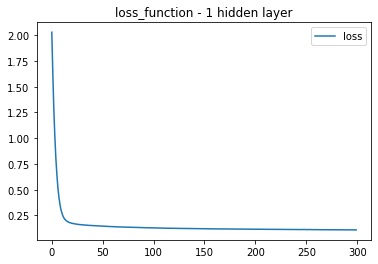

In [6]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [7]:
# Define the model - deep neural net
number_input_features = 6
hidden_nodes_layer1 =32
hidden_nodes_layer2 = 32

nn1 = Sequential([
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.relu),
    Dense(units=hidden_nodes_layer2, activation=tf.nn.relu),
    Dense(units=hidden_nodes_layer1, activation=tf.nn.relu),
    #Dense(units=18, activation=tf.nn.relu),
    Dense(units=1, activation="linear")
])

In [8]:
# Compile model
#nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
nn1.compile(loss=tf.losses.mean_squared_error, optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanSquaredError()])
# Fit the model
model_2 = nn1.fit(X_train_scaled, y_train, epochs=300,validation_data=(X_val, y_val),verbose=0)

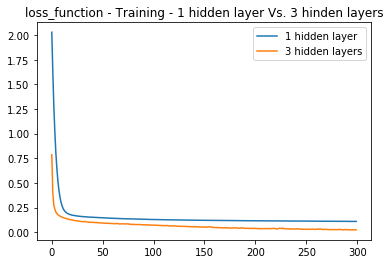

In [9]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 3 hinden layers")
plt.legend(["1 hidden layer", "3 hidden layers"])
plt.show()

In [10]:
# Evaluate the model using linear testing data
model_loss, model_accuracy = nn.evaluate(
    X_test_scaled, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

66/1 - 0s - loss: 0.2081 - mean_squared_error: 0.1846
Loss: 0.1846478283405304, Accuracy: 0.1846478283405304


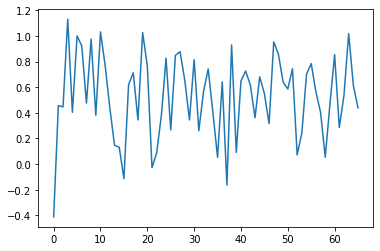

In [11]:
predicted_value = nn.predict(X_test_scaled)
plt.plot(predicted_value)
plt.show()